In [83]:
import pandas as pd

# 1

In [84]:
df = pd.read_csv("players.csv")

In [85]:
df = df.loc[:,:"saves"]
df

,surname,team,position,minutes,shots,passes,tackles,saves
0,Abdoun,Algeria,midfielder,16,0,6,0,0
1,Belhadj,Algeria,defender,270,1,146,8,0
2,Boudebouz,Algeria,midfielder,74,3,28,1,0
3,Bougherra,Algeria,defender,270,1,89,11,0
4,Chaouchi,Algeria,goalkeeper,90,0,17,0,2
...,...,...,...,...,...,...,...,...
590,Holden,USA,midfielder,4,0,2,0,0
591,Howard,USA,goalkeeper,390,0,81,0,14
592,Jozy Altidore,USA,forward,356,8,84,2,0
593,Onyewu,USA,defender,170,1,69,2,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   surname   595 non-null    object
 1   team      595 non-null    object
 2   position  595 non-null    object
 3   minutes   595 non-null    int64 
 4   shots     595 non-null    int64 
 5   passes    595 non-null    int64 
 6   tackles   595 non-null    int64 
 7   saves     595 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 37.3+ KB


In [87]:
df.isna().sum()

surname     0
team        0
position    0
minutes     0
shots       0
passes      0
tackles     0
saves       0
dtype: int64

In [88]:
df["shots_per_minute"] = df["shots"] / df["minutes"]
df["passes_per_minute"] = df["passes"] / df["minutes"]
df["tackles_per_minute"] = df["tackles"] / df["minutes"]
df["saves_per_minute"] = df["saves"] / df["minutes"]

In [89]:
df

,surname,team,position,minutes,shots,passes,tackles,saves,shots_per_minute,passes_per_minute,tackles_per_minute,saves_per_minute
0,Abdoun,Algeria,midfielder,16,0,6,0,0,0.000000,0.375000,0.000000,0.000000
1,Belhadj,Algeria,defender,270,1,146,8,0,0.003704,0.540741,0.029630,0.000000
2,Boudebouz,Algeria,midfielder,74,3,28,1,0,0.040541,0.378378,0.013514,0.000000
3,Bougherra,Algeria,defender,270,1,89,11,0,0.003704,0.329630,0.040741,0.000000
4,Chaouchi,Algeria,goalkeeper,90,0,17,0,2,0.000000,0.188889,0.000000,0.022222
...,...,...,...,...,...,...,...,...,...,...,...,...
590,Holden,USA,midfielder,4,0,2,0,0,0.000000,0.500000,0.000000,0.000000
591,Howard,USA,goalkeeper,390,0,81,0,14,0.000000,0.207692,0.000000,0.035897
592,Jozy Altidore,USA,forward,356,8,84,2,0,0.022472,0.235955,0.005618,0.000000
593,Onyewu,USA,defender,170,1,69,2,0,0.005882,0.405882,0.011765,0.000000


In [90]:
position_categories = df['position'].unique()
position_categories

array(['midfielder', 'defender', 'goalkeeper', 'forward'], dtype=object)

In [91]:
position_categories = ["goalkeeper","defender","midfielder","forward"]

In [92]:
df["position"] = pd.Categorical(df["position"], categories=position_categories, ordered=True)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   surname             595 non-null    object  
 1   team                595 non-null    object  
 2   position            595 non-null    category
 3   minutes             595 non-null    int64   
 4   shots               595 non-null    int64   
 5   passes              595 non-null    int64   
 6   tackles             595 non-null    int64   
 7   saves               595 non-null    int64   
 8   shots_per_minute    595 non-null    float64 
 9   passes_per_minute   595 non-null    float64 
 10  tackles_per_minute  595 non-null    float64 
 11  saves_per_minute    595 non-null    float64 
dtypes: category(1), float64(4), int64(5), object(2)
memory usage: 52.0+ KB


# 2

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\PP\AppData\Local\Temp\ipykernel_292\4116266640.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["passes"], shade=True)


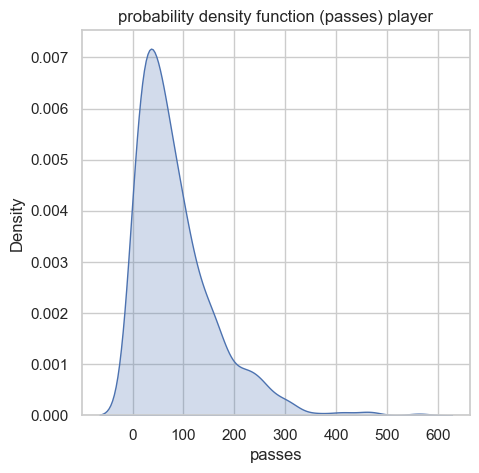

In [95]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
sns.kdeplot(df["passes"], shade=True)
plt.title("probability density function (passes) player")
plt.xlabel("passes")
plt.ylabel("Density")
plt.show()

# 3

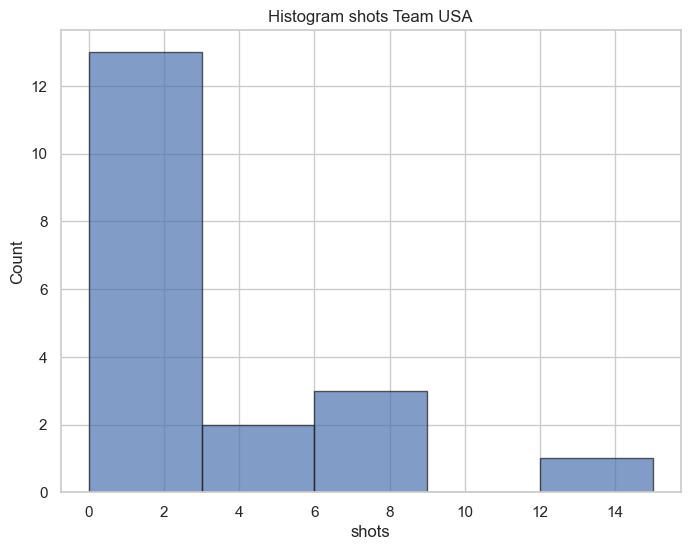

In [96]:
usa_shots = df[df["team"] == "USA"]["shots"]
plt.figure(figsize=(8, 6))
plt.hist(usa_shots, bins=5, edgecolor='k', alpha=0.7)
plt.title("Histogram shots Team USA")
plt.xlabel("shots")
plt.ylabel("Count")
plt.show()

# 4

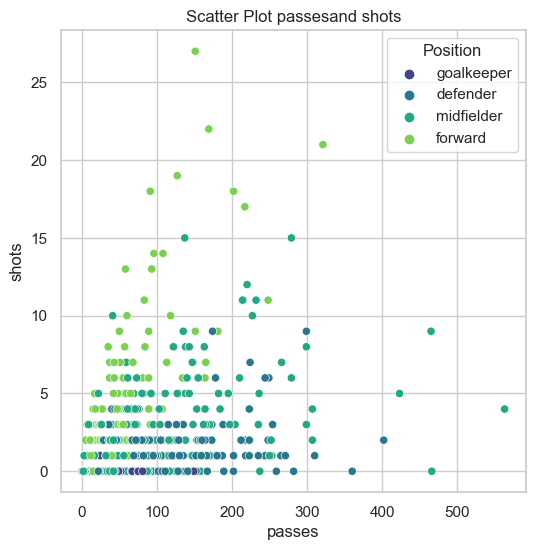

In [97]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x="passes", y="shots", hue="position", palette="viridis")
plt.title("Scatter Plot passesand shots")
plt.xlabel("passes")
plt.ylabel("shots")
plt.legend(title="Position")
plt.show()

# 5

In [98]:
teams_to_plot = ["Brazil", "Spain", "USA"]
filtered_df = df[df["team"].isin(teams_to_plot)]
teams_to_plot

['Brazil', 'Spain', 'USA']

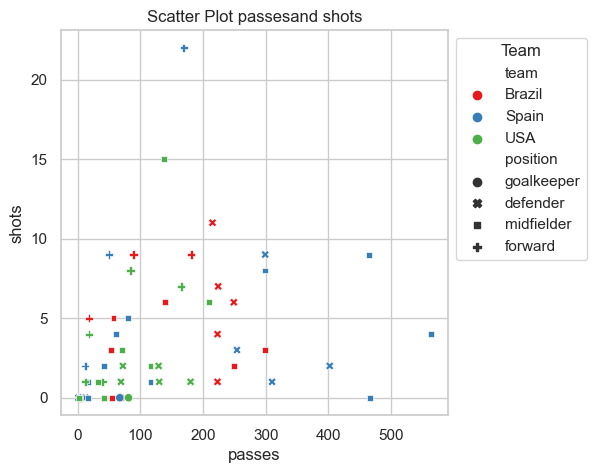

In [99]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=filtered_df, x="passes", y="shots", hue="team", style="position", palette="Set1")
plt.title("Scatter Plot passesand shots")
plt.xlabel("passes")
plt.ylabel("shots")
plt.legend(title="Team", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

# 6

In [106]:
teams_to_plot = ["Brazil", "Spain", "USA"]
filtered_df = df[df["team"].isin(teams_to_plot)]
filtered_df.head()

,surname,team,position,minutes,shots,passes,tackles,saves,shots_per_minute,passes_per_minute,tackles_per_minute,saves_per_minute
57,Baptista,Brazil,midfielder,82,0,42,1,0,0.000000,0.512195,0.012195,0.0
58,Daniel Alves,Brazil,defender,310,11,215,6,0,0.035484,0.693548,0.019355,0.0
59,Elano,Brazil,midfielder,140,5,57,6,0,0.035714,0.407143,0.042857,0.0
60,Fabiano,Brazil,forward,418,9,89,4,0,0.021531,0.212919,0.009569,0.0
61,Gilberto,Brazil,defender,33,0,6,4,0,0.000000,0.181818,0.121212,0.0


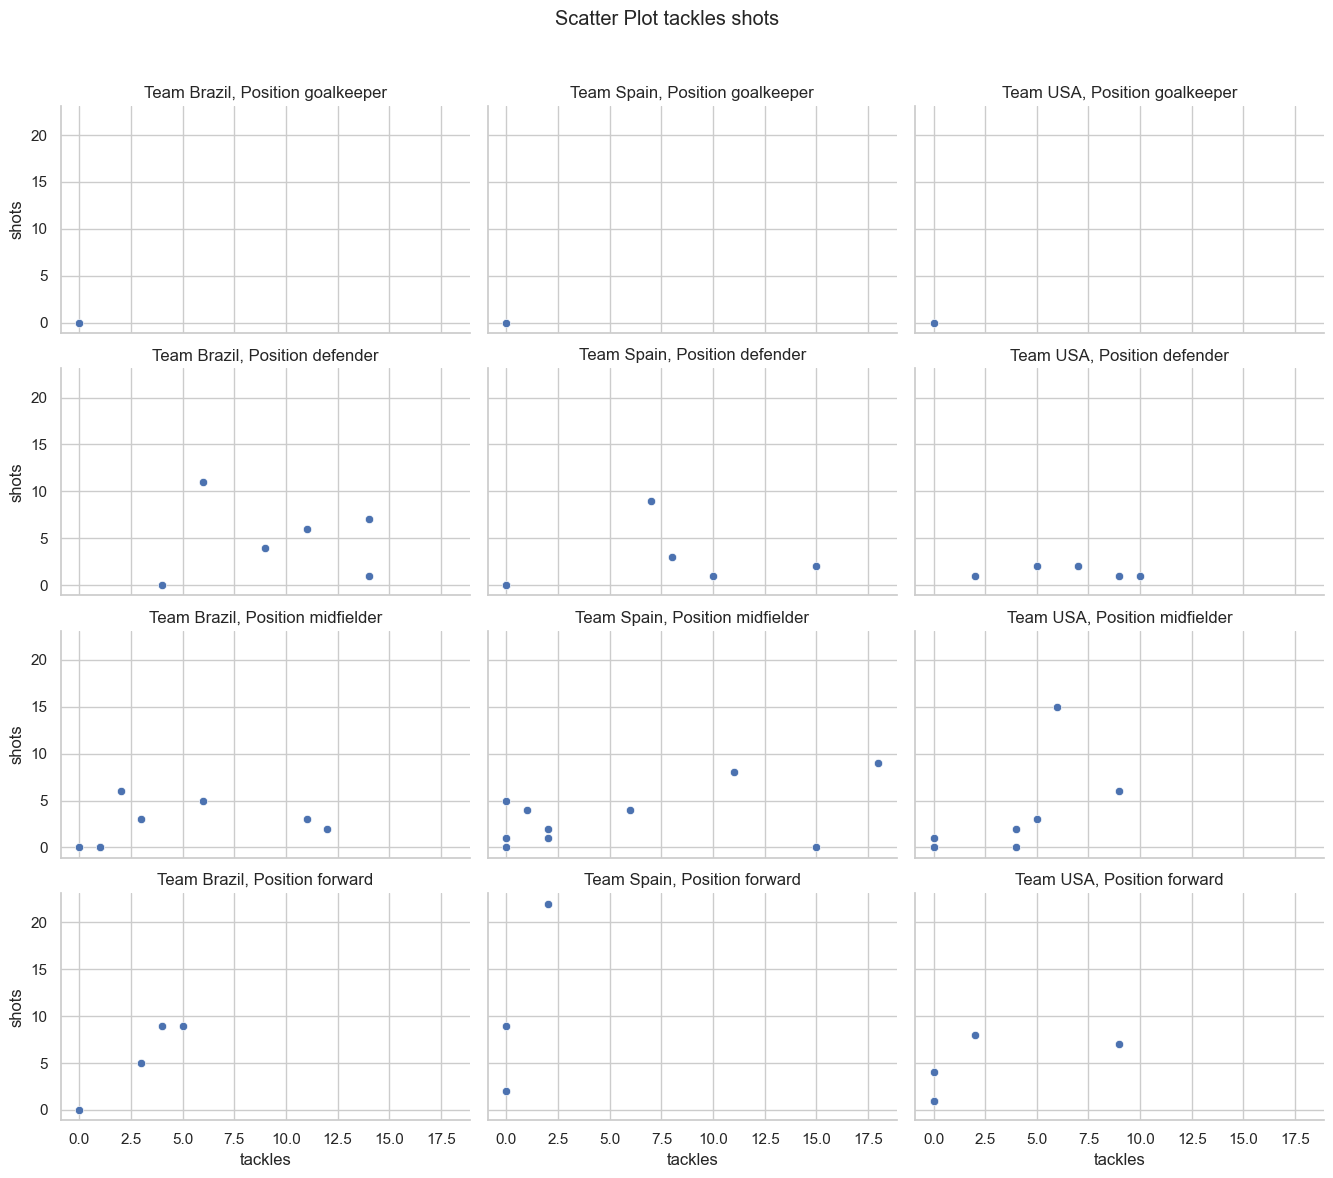

In [101]:
g = sns.FacetGrid(filtered_df, col="team", row="position", height=3, aspect=1.5)
g.map(sns.scatterplot, "tackles", "shots")
g.set_axis_labels("tackles", "shots")
g.set_titles("Team {col_name}, Position {row_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Scatter Plot tackles shots")
plt.show()

# 7

In [102]:
teams_to_plot = ["Brazil", "Spain", "USA"]
filtered_df = df[df["team"].isin(teams_to_plot)]

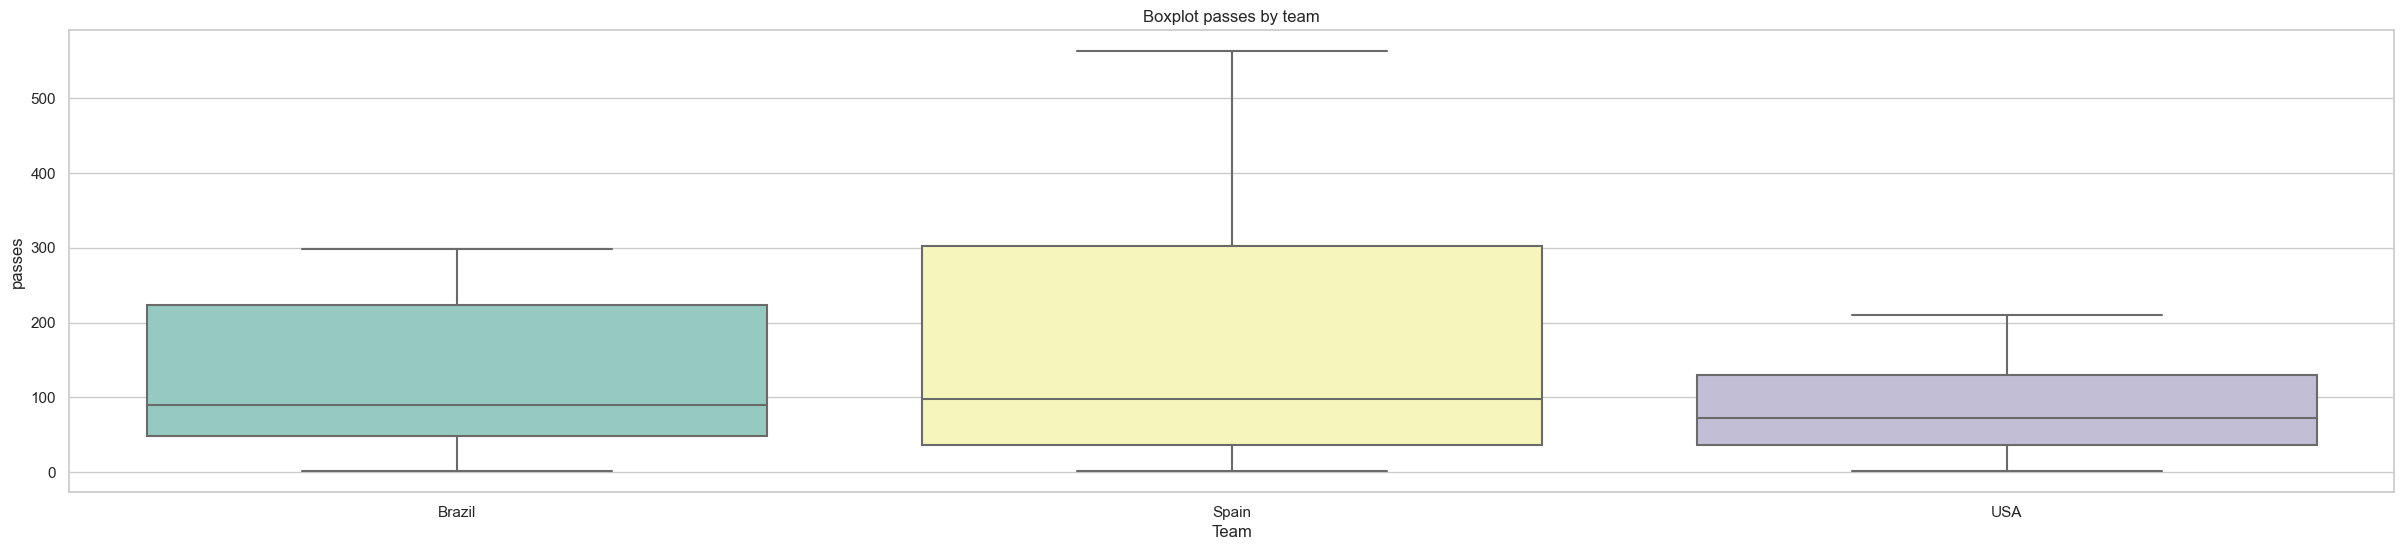

In [103]:
plt.figure(figsize=(30, 6))
sns.boxplot(data=filtered_df, x="team", y="passes", palette="Set3")
plt.title("Boxplot passes by team")
plt.xlabel("Team")
plt.ylabel("passes")
plt.show()

# 8

In [104]:
teams_to_plot = ["Brazil", "Spain", "USA"]
filtered_df = df[df["team"].isin(teams_to_plot)]

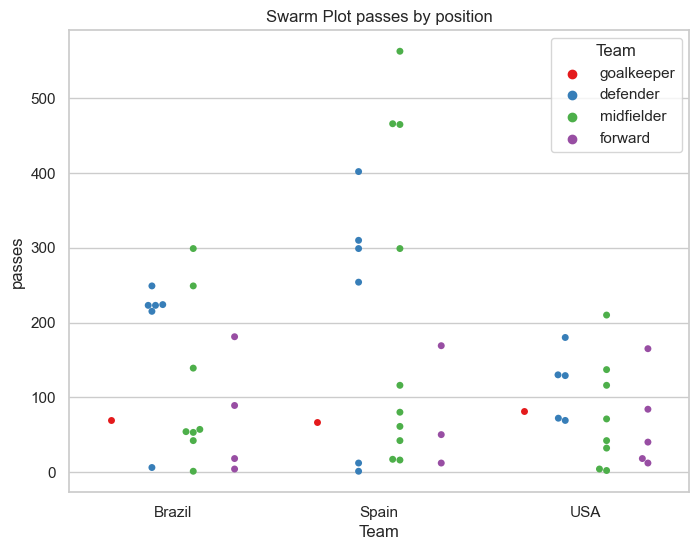

In [105]:
plt.figure(figsize=(8, 6))
sns.swarmplot(data=filtered_df, x="team", y="passes", hue="position", palette="Set1", dodge=True)
plt.title("Swarm Plot passes by position")
plt.xlabel("Team")
plt.ylabel("passes")
plt.legend(title="Team", loc="upper right")
plt.show()

# 9

In [107]:
teams_to_plot = ["Brazil", "Spain", "USA"]
filtered_df = df[df["team"].isin(teams_to_plot)]

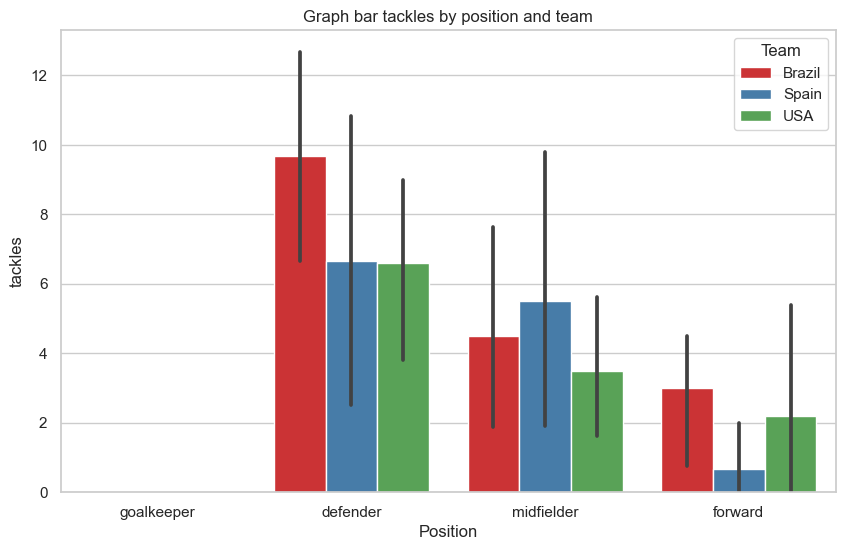

In [109]:
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_df, x="position", y="tackles", hue="team", palette="Set1")
plt.title("Graph bar tackles by position and team")
plt.xlabel("Position")
plt.ylabel("tackles")
plt.legend(title="Team")
plt.show()

# 10

In [113]:
teams_to_plot = ['Brazil','Japan','USA','Spain','Algeria','France','England','South Korea']
filtered_df = df[df["team"].isin(teams_to_plot)]

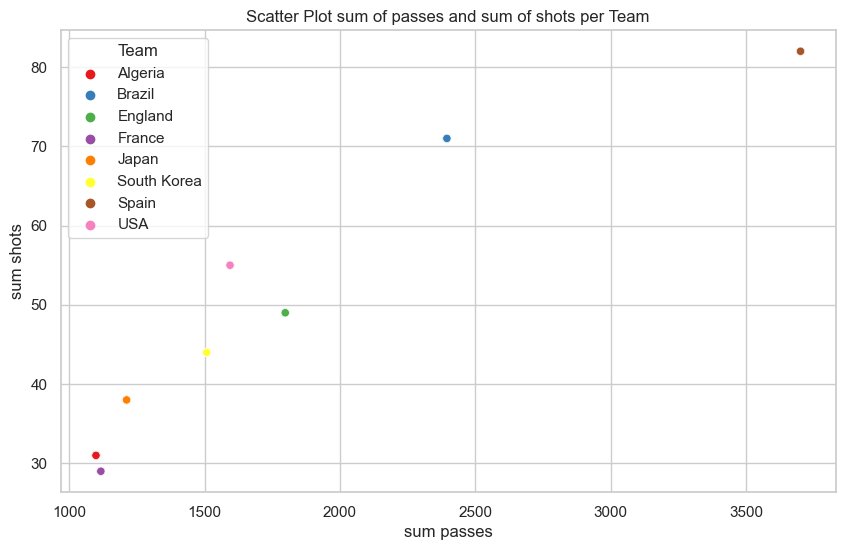

In [114]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x=filtered_df.groupby("team")["passes"].transform("sum"),
                y=filtered_df.groupby("team")["shots"].transform("sum"), hue="team", palette="Set1")
plt.title("Scatter Plot sum of passes and sum of shots per Team")
plt.xlabel("sum passes")
plt.ylabel("sum shots")
plt.legend(title="Team")
plt.show()